### 1. Importing Libraries and Datasets

In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


### 2. Requiring stopword and punkt from nltk library for NLP

In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data = pd.read_csv('amazon.csv')
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


### 3. Preprocessing and cleaning the reviews 

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [34]:
data.dropna(inplace=True)


In [35]:
data.isnull().sum()

Text     0
label    0
dtype: int64

In [36]:
stp_words=stopwords.words('english')
def clean_review(review): 
    cleanreview=" ".join(word for word in review.split() if word not in stp_words)
    return cleanreview 

data['Text']=data['Text'].apply(clean_review)


In [37]:
data.head()


,Text,label
0,This best apps acording bunch people I agree b...,1
1,This pretty good version game free. There LOTS...,1
2,really . bunch levels find golden eggs. super ...,1
3,"This silly game frustrating, lots fun definite...",1
4,This terrific game pad. Hrs fun. My grandkids ...,1


### 4. Analysis of the Dataset

In [38]:
data['label'].value_counts()


label
1    15230
0     4766
Name: count, dtype: int64

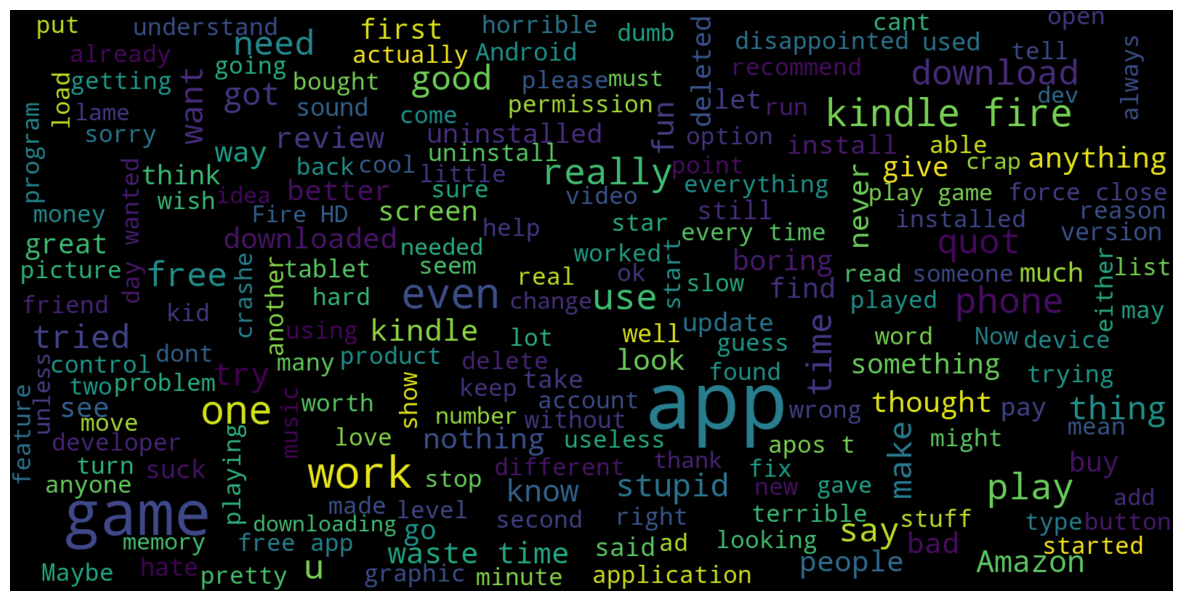

In [39]:
consolidated=' '.join(word for word in data['Text'][data['label']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


### 5. Converting text into Vectors

In [40]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Text'] ).toarray()


### 6. Model training, Evaluation, and Prediction

In [41]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['label'],
												test_size=0.25 ,
												random_state=42)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.8885777155431086


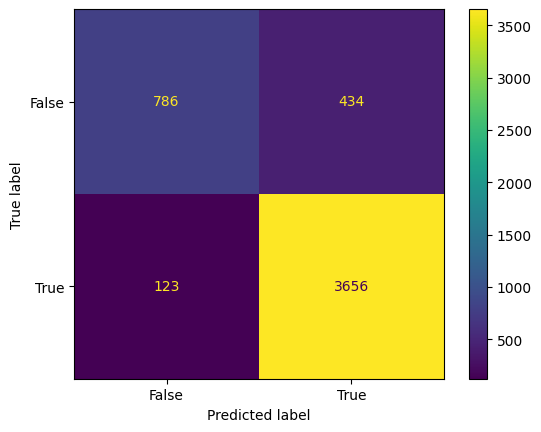

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True])

cm_display.plot()
plt.show()
